# Vino Verde Dataset 

Téléchargez le dataset winequality-red à partir du drive du cours ou en suivant le lien [wine_data](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) qui vous donne une description plus détaillée des données

1. Importez les librairies usuelles 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uuid

2. Visualisez le  noms des variables du dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.3%20--%20Machine%20Learning%20Supervis%C3%A9/S3-2%20--%20R%C3%A9gression%20Logistique%20-%20Cross%20validation/S3-2B/Datasets/winequality-red.csv?token=AKXWOP2NTTMC6JJRSG53UFS5BN2CK")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3. Donnez le type de toutes les variables explicatives

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


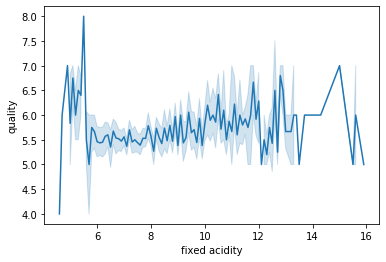

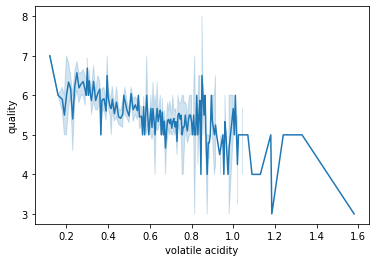

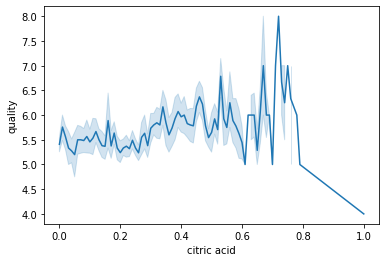

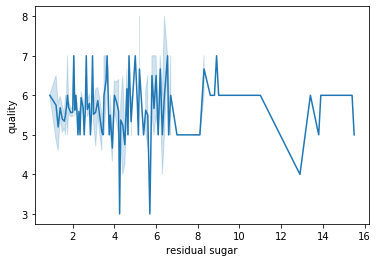

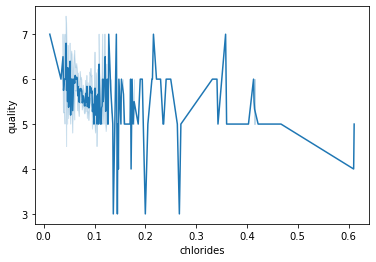

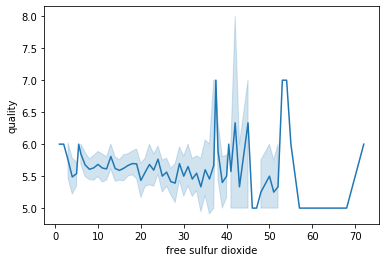

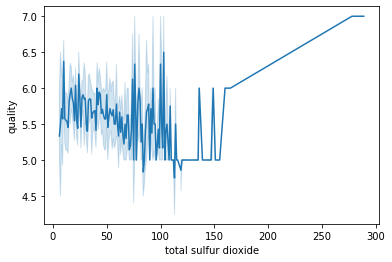

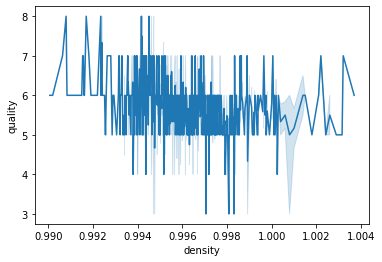

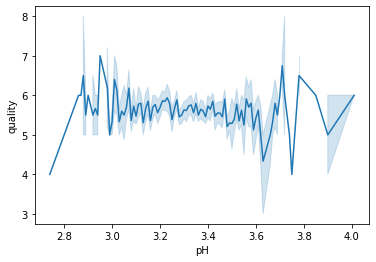

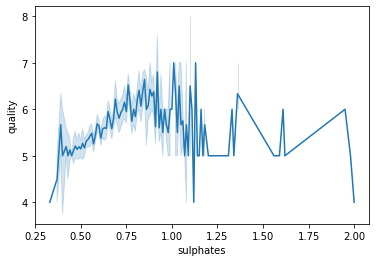

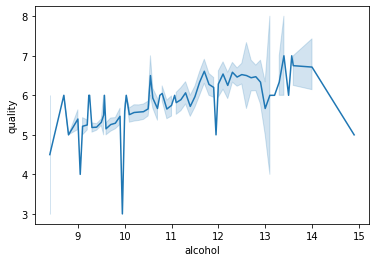

In [14]:
for col in df.columns[:-1]:
    plt.figure()
    sns.lineplot(col, "quality", data = df)

4. Tracez des graphiques représentant la qualité du vin en fonction de chaque variable explicative prise une a une

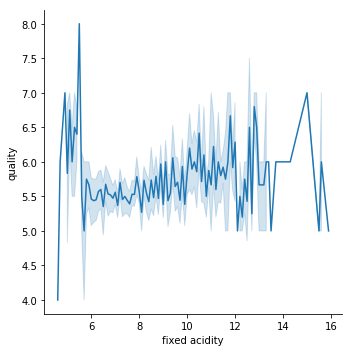

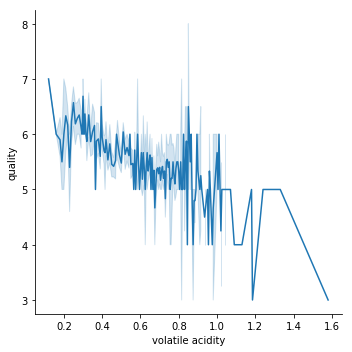

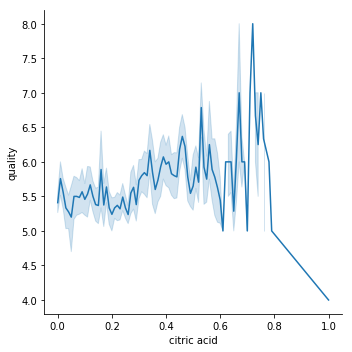

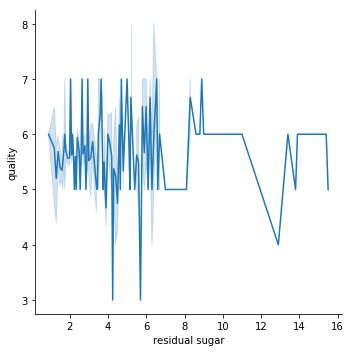

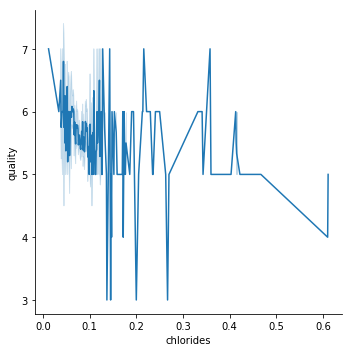

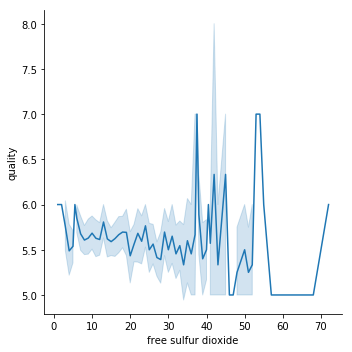

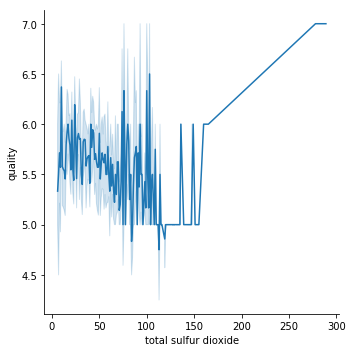

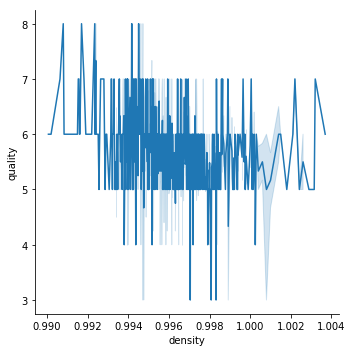

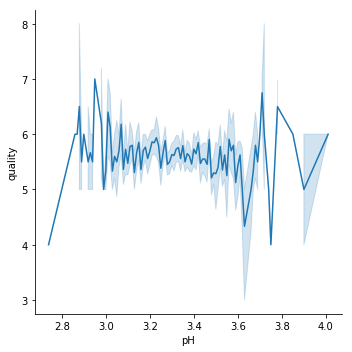

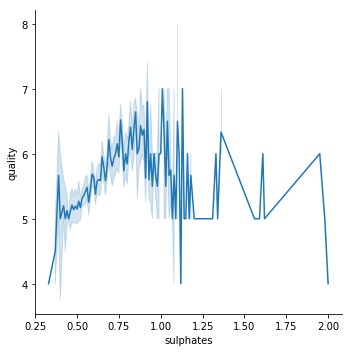

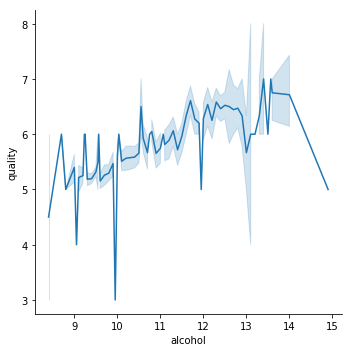

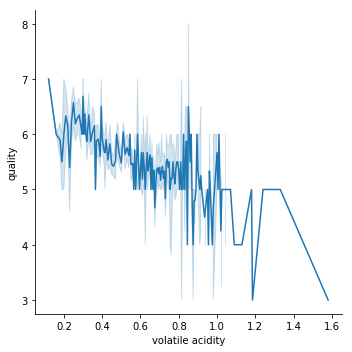

5. Les variables ont elles besoin d’encodage ou de normalisation ? Si oui appliquez l’encodage et la normalisation adaptées

In [28]:
X = df.iloc[:, :-1]
y = df["quality"]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)  

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0, solver = "lbfgs", multi_class = "multinomial").fit(X_train, y_train)

/home/omar/Dev/Jedha/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [44]:
clf.score(X_test, y_test)

0.6

6. Calculez votre score. Qu'en pensez-vous ?

In [54]:
from sklearn.model_selection import cross_validate
cross = cross_validate(clf, X, y, cv = 10)

/home/omar/Dev/Jedha/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/omar/Dev/Jedha/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/omar/Dev/Jedha/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/omar/Dev/Jedha/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/omar/Dev/Jedha/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase t

In [55]:
cross["test_score"].mean()

0.5754753881184629

7. Faites une cross_validation pour vérifier ce score 

Le score après cross validation est 0.5945943360122464


8. Créez un ```y_pred``` qui va être la prédiction pour les valeurs de ```X_test```

In [56]:
y_pred = clf.predict(X_test)

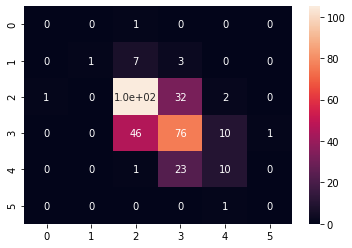

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

9. Créez une matrice de confusion pour voir où vous vous êtes le plus trompé. Mettez celle-ci dans une heatmap

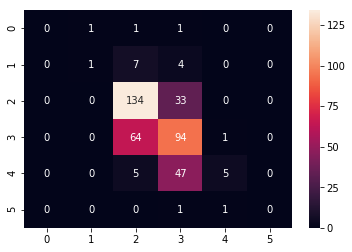

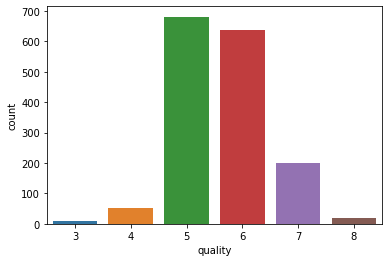

In [58]:
sns.countplot("quality", data = df)

10. Regardez la note qui revient le plus souvent dans votre dataset 

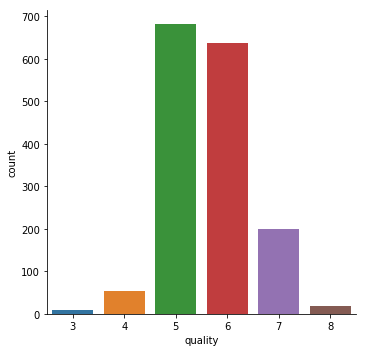

11. Quel serait votre score si vous avez toujours prédit la valeur 5 ?

In [61]:
y_pred5 = np.repeat(5, len(y_pred))

[5, 5, 5, 5, 5]

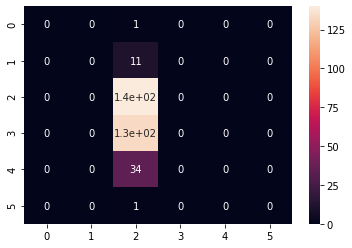

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot = True)

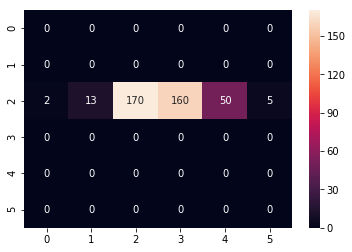

In [63]:
clf.score(X_test, y_pred5)

0.5

Notre score si l'on avait tout le temps prédit la valeur la plus fréquente : 0.425 


12. Que pouvez vous conclure sur la qualité de votre modèle ? 

13. Classez maintenant les features les importantes selon votre modèle. Pour cela on pourra s'aider de la métrique Chi2 

Vous pourrez trouver plus de détails dans [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

In [68]:
from sklearn.feature_selection import chi2
corr_df = pd.DataFrame(np.array(chi2(X,y)).transpose(), columns = ["Chi2 Score", "P-value"], index = df.columns[:-1])
corr_df.sort_values("Chi2 Score", ascending = False, inplace = True)

In [69]:
corr_df

,Chi2 Score,P-value
total sulfur dioxide,2755.557984,0.000000e+00
free sulfur dioxide,161.936036,3.827288e-33
alcohol,46.429892,7.424038e-09
volatile acidity,15.580289,8.150352e-03
citric acid,13.025665,2.313944e-02
fixed acidity,11.260652,4.645004e-02
sulphates,4.558488,4.720963e-01
residual sugar,4.123295,5.318047e-01
chlorides,0.752426,9.799680e-01
pH,0.154655,9.995265e-01


(array([1.12606524e+01, 1.55802891e+01, 1.30256651e+01, 4.12329474e+00,
        7.52425579e-01, 1.61936036e+02, 2.75555798e+03, 2.30432045e-04,
        1.54654736e-01, 4.55848775e+00, 4.64298922e+01]),
 array([4.64500416e-02, 8.15035154e-03, 2.31394417e-02, 5.31804675e-01,
        9.79968040e-01, 3.82728810e-33, 0.00000000e+00, 1.00000000e+00,
        9.99526491e-01, 4.72096321e-01, 7.42403757e-09]))

14. Mettez ces valeurs dans un DataFrame pour mieux comprendre ces valeurs 

,Chi2 Score,P-value
total sulfur dioxide,2755.557984,0.000000e+00
free sulfur dioxide,161.936036,3.827288e-33
alcohol,46.429892,7.424038e-09
volatile acidity,15.580289,8.150352e-03
citric acid,13.025665,2.313944e-02
fixed acidity,11.260652,4.645004e-02
sulphates,4.558488,4.720963e-01
residual sugar,4.123295,5.318047e-01
chlorides,0.752426,9.799680e-01
pH,0.154655,9.995265e-01


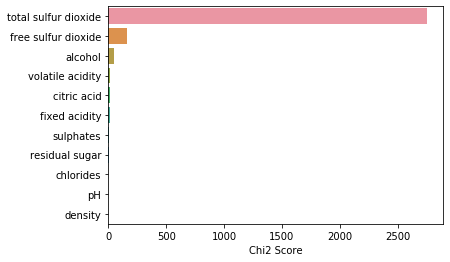

In [72]:
sns.barplot("Chi2 Score", corr_df.index,data = corr_df, orient = "h")

15. Pour terminer, mettez ces variables dans un bar chart

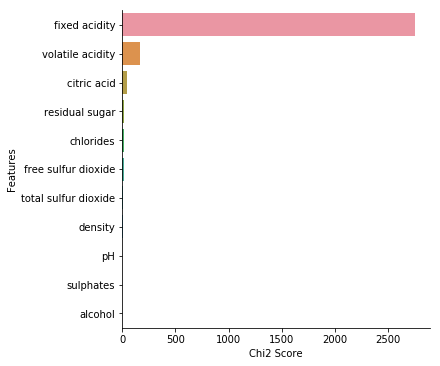